In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [4]:
# load the file
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [7]:
# check any missing value
df.isnull().values.any()

False

In [8]:
fraud = df.loc[df.Class == 1]
print('Details of fraudulent transaction')
fraud.Amount.describe()

Details of fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [9]:
nonFraud = df.loc[df.Class == 0]
print('Details of non-fraudulent transaction')
nonFraud.Amount.describe()

Details of non-fraudulent transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
# check if target class is balanced or not
print(df.Class.value_counts())

0    284315
1       492
Name: Class, dtype: int64


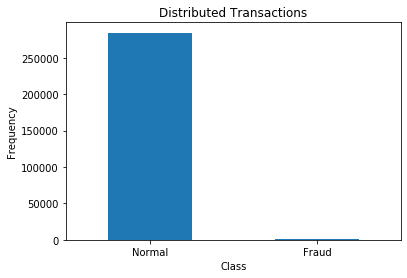

In [11]:
# plot normal and fraud distribution
count_classes = pd.value_counts(df['Class'], sort=True)
count_classes.plot(kind='bar', rot=0)

plt.title("Distributed Transactions")
plt.xticks(range(2), ['Normal', 'Fraud'])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

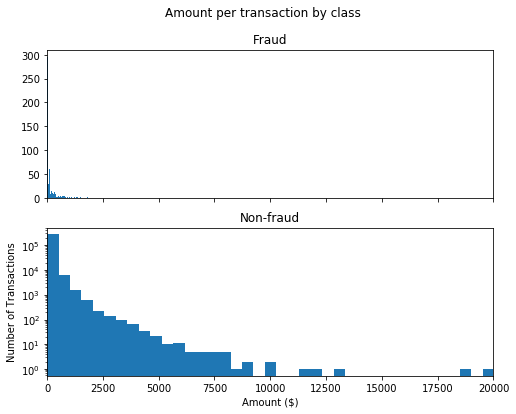

In [12]:
fig, (axis1, axis2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
fig.suptitle('Amount per transaction by class')
bins = 50

axis1.hist(fraud.Amount, bins = bins)
axis1.set_title('Fraud')
axis2.hist(nonFraud.Amount, bins = bins)
axis2.set_title('Non-fraud')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

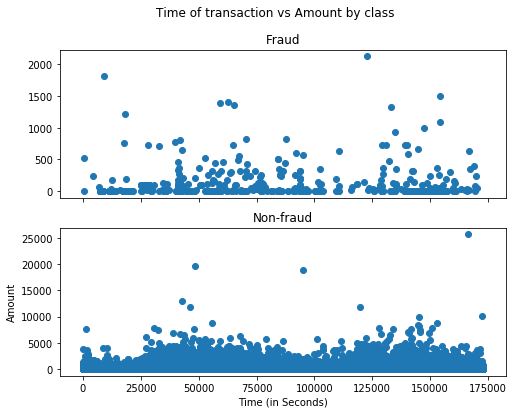

In [13]:
fig, (axis1, axis2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
fig.suptitle('Time of transaction vs Amount by class')

axis1.scatter(fraud.Time, fraud.Amount)
axis1.set_title('Fraud')
axis2.scatter(nonFraud.Time, nonFraud.Amount)
axis2.set_title('Non-fraud')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

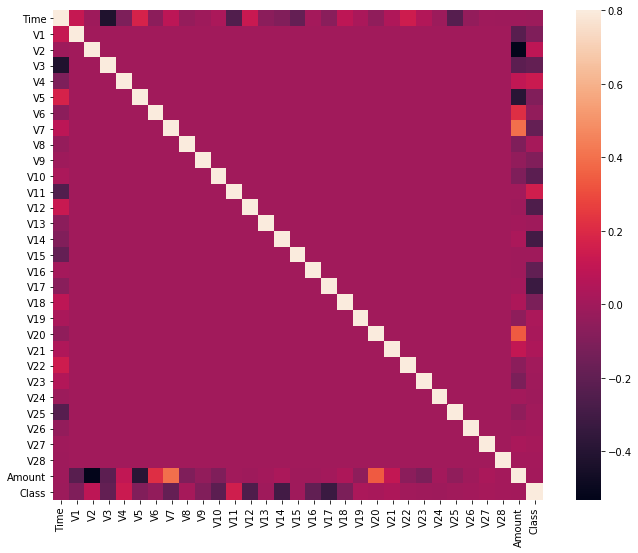

In [14]:
# correlation matrix
corr_matrix = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corr_matrix, vmax = .8, square = True)
plt.show()

In [29]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Class'],axis=1), 
                                                    df['Class'], test_size=0.2, 
                                                    random_state=42)

In [16]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

## Logistic Regression

In [17]:
reg = LogisticRegression(solver='lbfgs').fit(X_train,y_train)

/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [18]:
reg_acc = reg.score(X_test, y_test)*100
print('Accuracy:',reg_acc)

Accuracy: 99.86306660580738


In [18]:
y_pred = reg.predict(X_test)

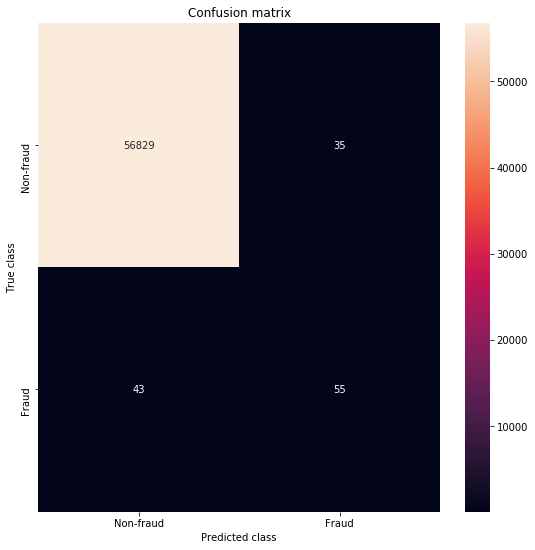

In [20]:
# drawing the confusion matrix for this model
LABELS = ['Non-fraud', 'Fraud']
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9, 9))
sns.heatmap(cm, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

## Support Vector Machines

In [20]:
svm_clf = SVC(gamma='scale', probability=True).fit(X_train,y_train)

In [21]:
svm_acc = svm_clf.score(X_test, y_test)*100
print('Accuracy:',svm_acc)

Accuracy: 99.82795547909133


In [22]:
y_pred = svm_clf.predict(X_test)

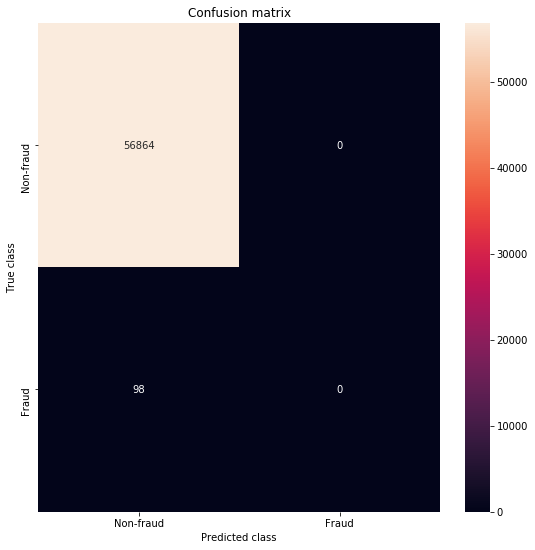

In [23]:
# drawing the confusion matrix for this model
LABELS = ['Non-fraud', 'Fraud']
cm = confusion_matrix(y_test.tolist(), y_pred.tolist())
plt.figure(figsize=(9, 9))
sns.heatmap(cm, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

## Random Forest Classifier

In [24]:
rnd_clf = RandomForestClassifier(n_estimators=250,max_depth=100,random_state=0)

rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [25]:
rnd_acc = rnd_clf.score(X_test, y_test)*100
print('Accuracy:',rnd_acc)

Accuracy: 99.95962220427653


In [26]:
y_pred = rnd_clf.predict(X_test)

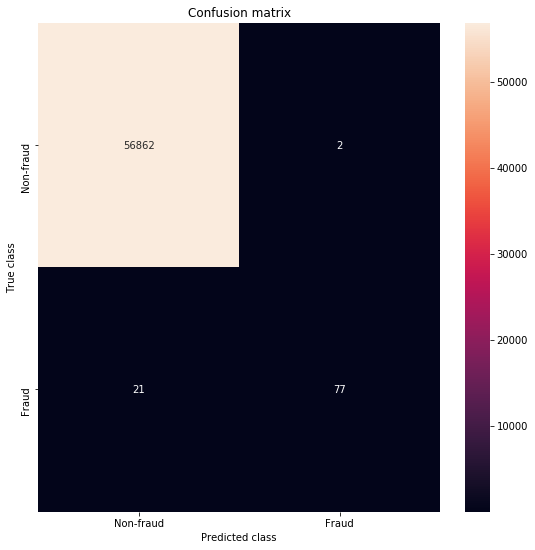

In [27]:
# drawing the confusion matrix for this model
LABELS = ['Non-fraud', 'Fraud']
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9, 9))
sns.heatmap(cm, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [30]:
# see the importances of features
feature_importances = pd.DataFrame(rnd_clf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)

In [31]:
print(feature_importances)

        importance
V17       0.153534
V12       0.130964
V14       0.114575
V10       0.091361
V11       0.079363
V16       0.063218
V9        0.036650
V18       0.031408
V4        0.025529
V7        0.023798
V26       0.018477
V21       0.017027
V1        0.016204
V3        0.015941
V6        0.014328
V20       0.013636
V19       0.012789
V2        0.012597
V8        0.012501
V27       0.012489
V5        0.012119
Time      0.011920
Amount    0.011419
V28       0.011254
V15       0.011092
V13       0.010167
V22       0.010071
V24       0.008969
V25       0.008792
V23       0.007807


In [32]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Algorithm", "Accuracy"]

x.add_row(["Logistic Regression", reg_acc])
x.add_row(["Support Vector Machines", svm_acc])
x.add_row(["Random Forest Classifier", rnd_acc])

print(x)

+--------------------------+-------------------+
|        Algorithm         |      Accuracy     |
+--------------------------+-------------------+
|   Logistic Regression    | 99.86306660580738 |
| Support Vector Machines  | 99.82795547909133 |
| Random Forest Classifier | 99.95962220427653 |
+--------------------------+-------------------+
